In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from os import listdir
from os.path import isfile, join
from scipy.stats import pearsonr

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
# ==========================================================    
# Declaração de constantes
# ==========================================================    

CSV_DIR = '../csv/metricas_redes_complexas'
CSV_DESEMPENHO = '../csv/pacotes_e2e_medias.csv'

# monta o dataframe Pandas usando todos os arquivos .csv
csv_files = [f for f in listdir(CSV_DIR) if (isfile(join(CSV_DIR, f)))]
dataframes = []
for f in csv_files:
    df = pd.read_csv(join(CSV_DIR, f), low_memory = False)
    dataframes.append(df)
df_metricas = pd.concat(dataframes)

if os.path.isfile(CSV_DESEMPENHO):
    df_cenarios = pd.read_csv(CSV_DESEMPENHO, low_memory = False)
    
df_aux = df_metricas.groupby(by = ['hosts', 'speed', 'timeout', 'round_idx'], as_index = False).agg({'avg_degree': ['mean', 'std'], 'density': ['mean', 'std'], 'avg_clustering_coef': ['mean', 'std']})
df_aux.columns = [' '.join(col).strip() for col in df_aux.columns.values]
df_desempenho_metricas = pd.merge(df_cenarios, df_aux, on = ['hosts', 'speed', 'timeout', 'round_idx'])    

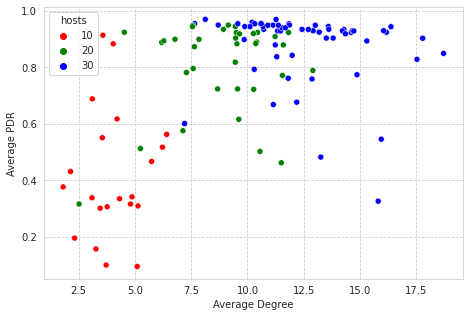

In [72]:
fig, ax = plt.subplots(figsize = (7.5, 5))
ax.xaxis.grid(True)
sns.set_style("whitegrid", {'grid.linestyle': '--'})
df = df_desempenho_metricas.query("timeout == 3 and speed > 1")
g = sns.scatterplot(data = df, x = "avg_degree mean", y = "pdr", hue = "hosts", ax = ax, palette = ['red', 'green', 'blue'])
g.set(xlabel = "Average Degree", ylabel = "Average PDR", title = None)
plt.show()

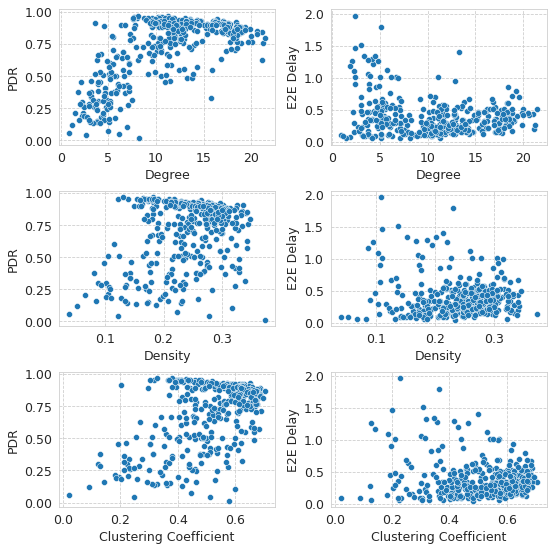

In [8]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (7.5, 7.5))
fig.tight_layout(h_pad = 2.5, w_pad = 2.5)
sns.set_style("whitegrid", {'grid.linestyle': '--'})

df = df_desempenho_metricas.query("timeout == 3 and speed > 1")
g = sns.scatterplot(data = df, x = "avg_degree mean", y = "pdr", ax = axes[0, 0])
g.xaxis.grid(True)
g.set(xlabel = "Degree", ylabel = "PDR", title = None)
g.tick_params(labelsize = 12.5)
g.xaxis.label.set_size(12.5)
g.yaxis.label.set_size(12.5)

df = df_desempenho_metricas.query("timeout == 3 and speed > 1")
g = sns.scatterplot(data = df, x = "density mean", y = "pdr", ax = axes[1, 0])
g.xaxis.grid(True)
g.set(xlabel = "Density", ylabel = "PDR", title = None)
g.tick_params(labelsize = 12.5)
g.xaxis.label.set_size(12.5)
g.yaxis.label.set_size(12.5)


df = df_desempenho_metricas.query("timeout == 3 and speed > 1")
g = sns.scatterplot(data = df, x = "avg_clustering_coef mean", y = "pdr", ax = axes[2, 0])
g.xaxis.grid(True)
g.set(xlabel = "Clustering Coefficient", ylabel = "PDR", title = None)
g.tick_params(labelsize = 12.5)
g.xaxis.label.set_size(12.5)
g.yaxis.label.set_size(12.5)


df = df_desempenho_metricas.query("timeout == 3 and speed > 1")
g = sns.scatterplot(data = df, x = "avg_degree mean", y = "e2e_mean", ax = axes[0, 1])
g.xaxis.grid(True)
g.set(xlabel = "Degree", ylabel = "E2E Delay", title = None)
g.tick_params(labelsize = 12.5)
g.xaxis.label.set_size(12.5)
g.yaxis.label.set_size(12.5)


df = df_desempenho_metricas.query("timeout == 3 and speed > 1")
g = sns.scatterplot(data = df, x = "density mean", y = "e2e_mean", ax = axes[1, 1])
g.xaxis.grid(True)
g.set(xlabel = "Density", ylabel = "E2E Delay", title = None)
g.tick_params(labelsize = 12.5)
g.xaxis.label.set_size(12.5)
g.yaxis.label.set_size(12.5)


df = df_desempenho_metricas.query("timeout == 3 and speed > 1")
g = sns.scatterplot(data = df, x = "avg_clustering_coef mean", y = "e2e_mean", ax = axes[2, 1])
g.xaxis.grid(True)
g.set(xlabel = "Clustering Coefficient", ylabel = "E2E Delay", title = None)
g.tick_params(labelsize = 12.5)
g.xaxis.label.set_size(12.5)
g.yaxis.label.set_size(12.5)


plt.show()

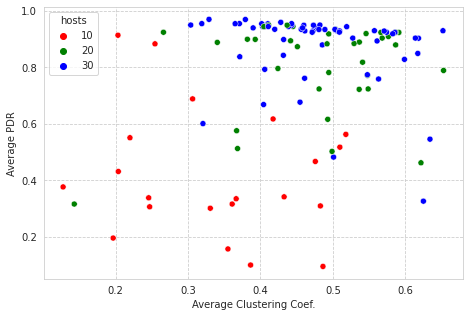

In [77]:
fig, ax = plt.subplots(figsize = (7.5, 5))
ax.xaxis.grid(True)
sns.set_style("whitegrid", {'grid.linestyle': '--'})
df = df_desempenho_metricas.query("timeout == 3 and speed > 1")
g = sns.scatterplot(data = df, x = "avg_clustering_coef mean", y = "pdr", hue = "hosts", ax = ax, palette = ['red', 'green', 'blue'])
g.set(xlabel = "Average Clustering Coef.", ylabel = "Average PDR", title = None)
plt.show()

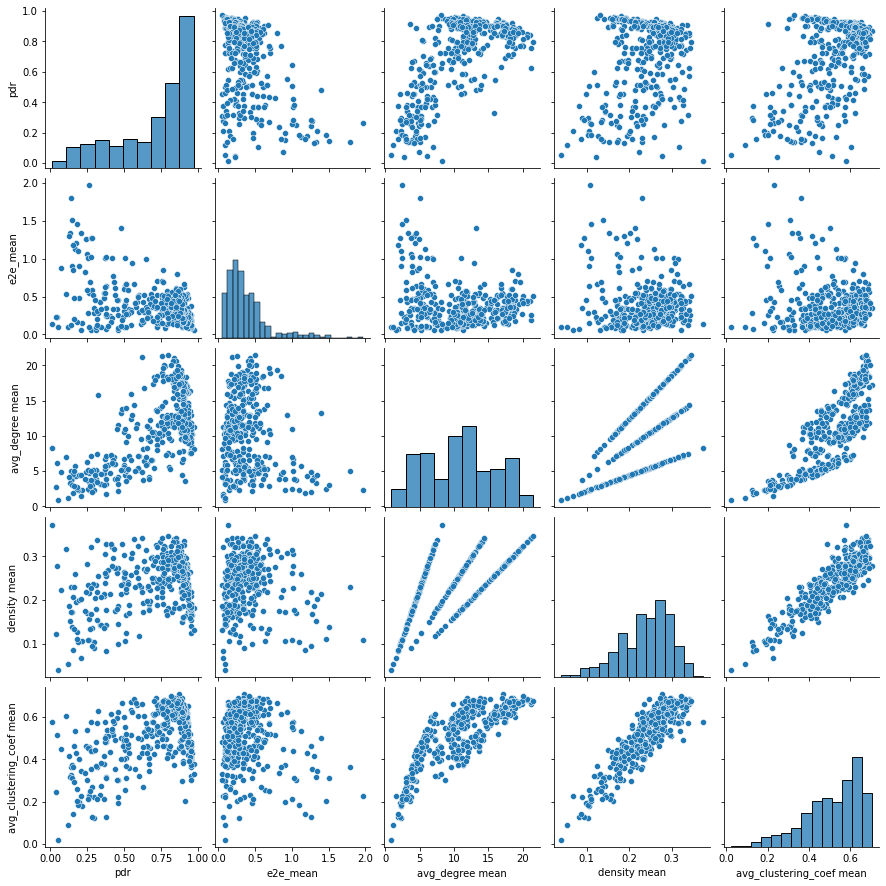

In [6]:
df = df_desempenho_metricas.query("timeout == 3 and speed > 1")[['pdr', 'e2e_mean', 'avg_degree mean', 'density mean', 'avg_clustering_coef mean']]
sns.pairplot(df)

In [8]:
rho = df.corr()
pval = df.corr(method = lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.001,0.01,0.05] if x<=t]))
rho.round(2).astype(str) + p

,pdr,e2e_mean,avg_degree mean,density mean,avg_clustering_coef mean
pdr,1.0***,-0.45***,0.69***,0.33***,0.54***
e2e_mean,-0.45***,1.0***,-0.2***,-0.08,-0.15**
avg_degree mean,0.69***,-0.2***,1.0***,0.66***,0.8***
density mean,0.33***,-0.08,0.66***,1.0***,0.9***
avg_clustering_coef mean,0.54***,-0.15**,0.8***,0.9***,1.0***
